In [1]:
import pandas as pd 
import numpy as np
import pickle 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import joblib
import pickle

In [2]:
# Load Data Train csv
train = pd.read_csv(r'data/new_train.csv')
n_descriptor = 10 #kombinasi terbaik

In [3]:
# Load Pickle 
label = pickle.load(open("data/new_corr_Label.p", "rb"))
train = train[label]

In [4]:
train

,ALogp2,nB,nP,nBr,nI,ATS7i,AATS3v,AATS8v,ATSC3c,ATSC5m,...,E2m,E3m,Dm,E1v,E2v,E3v,Dv,L3e,E2i,pIC50
0,5.184729,0,0,0.0,0.0,20360.274320,181.414205,153.824564,-0.000425,52.116614,...,0.233683,0.258135,1.181705,0.572119,0.320099,0.219934,1.112152,1.492006,0.562046,6.374
1,0.263888,0,0,0.0,0.0,22349.326271,182.861205,165.919046,0.105691,-290.620559,...,0.428968,0.210442,1.066404,0.431121,0.453627,0.223002,1.107750,1.365727,0.505967,5.678
2,0.886046,0,0,0.0,0.0,21950.366095,157.999264,135.478743,-0.017762,-660.093230,...,0.222998,0.225553,1.128391,0.528420,0.318439,0.247706,1.094565,1.498185,0.445473,8.000
3,4.265464,0,0,0.0,0.0,23984.067652,190.854496,163.547841,0.100728,-169.842476,...,0.331063,0.127462,1.251017,0.595796,0.340991,0.176315,1.113101,1.199812,0.476197,6.824
4,1.322730,0,0,0.0,0.0,27406.546358,196.145758,163.758351,-0.224591,74.515393,...,0.490903,0.226592,1.372380,0.522234,0.373392,0.284822,1.180448,1.849080,0.380050,8.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.940318,0,0,0.0,0.0,27004.809453,190.578318,160.265812,-0.202137,-71.265077,...,0.544440,0.134143,1.093006,0.462373,0.414339,0.202516,1.079227,1.342604,0.387285,7.387
103,0.004409,0,0,0.0,0.0,26529.619334,203.442240,179.966324,0.039857,417.090789,...,0.424532,0.179649,0.893871,0.360620,0.387568,0.220182,0.968370,1.277973,0.469035,6.821
104,0.254722,0,0,0.0,0.0,24767.463319,190.794647,159.472416,0.033585,-209.682278,...,0.347029,0.117151,1.203550,0.577268,0.343409,0.170919,1.091597,1.177916,0.480495,6.652
105,0.001459,0,0,0.0,0.0,23657.253254,198.839262,169.903090,-0.068573,-380.025379,...,0.576355,0.122466,1.393676,0.572530,0.436062,0.205442,1.214034,1.329818,0.492531,5.958


In [5]:
train.head()

,ALogp2,nB,nP,nBr,nI,ATS7i,AATS3v,AATS8v,ATSC3c,ATSC5m,...,E2m,E3m,Dm,E1v,E2v,E3v,Dv,L3e,E2i,pIC50
0,5.184729,0,0,0.0,0.0,20360.274320,181.414205,153.824564,-0.000425,52.116614,...,0.233683,0.258135,1.181705,0.572119,0.320099,0.219934,1.112152,1.492006,0.562046,6.374
1,0.263888,0,0,0.0,0.0,22349.326271,182.861205,165.919046,0.105691,-290.620559,...,0.428968,0.210442,1.066404,0.431121,0.453627,0.223002,1.107750,1.365727,0.505967,5.678
2,0.886046,0,0,0.0,0.0,21950.366095,157.999264,135.478743,-0.017762,-660.093230,...,0.222998,0.225553,1.128391,0.528420,0.318439,0.247706,1.094565,1.498185,0.445473,8.000
3,4.265464,0,0,0.0,0.0,23984.067652,190.854496,163.547841,0.100728,-169.842476,...,0.331063,0.127462,1.251017,0.595796,0.340991,0.176315,1.113101,1.199812,0.476197,6.824
4,1.322730,0,0,0.0,0.0,27406.546358,196.145758,163.758351,-0.224591,74.515393,...,0.490903,0.226592,1.372380,0.522234,0.373392,0.284822,1.180448,1.849080,0.380050,8.108


In [6]:
train, test = train_test_split(train, test_size = 0.2, random_state = 10)
train.shape, test.shape 

((85, 578), (22, 578))

In [7]:
X_train = train.iloc[:,:-1]
X_test = test.iloc[:,:-1]
y_train = train.iloc[:, [-1]]
y_test = test.iloc[:,[-1]]

In [8]:
train

,ALogp2,nB,nP,nBr,nI,ATS7i,AATS3v,AATS8v,ATSC3c,ATSC5m,...,E2m,E3m,Dm,E1v,E2v,E3v,Dv,L3e,E2i,pIC50
98,0.602952,0,0,0.0,0.0,22965.439255,185.329157,172.228170,-0.018013,-674.527601,...,0.550546,0.236690,1.319185,0.560627,0.475540,0.294551,1.330718,2.355297,0.507155,5.721
76,0.140100,0,0,0.0,0.0,21597.399809,191.374692,170.964395,0.010270,-1120.565429,...,0.404279,0.359642,1.014407,0.294862,0.353384,0.278239,0.926486,2.006267,0.390023,5.796
71,2.415848,0,0,0.0,0.0,18010.105497,183.079857,159.641110,0.044981,6.425203,...,0.465818,0.296111,1.410707,0.573754,0.455861,0.321570,1.351185,1.739430,0.511224,6.069
56,0.809460,0,0,0.0,0.0,24946.374643,189.799498,158.557874,0.011842,-173.766137,...,0.324760,0.120450,1.114521,0.540227,0.338831,0.170970,1.050029,1.093791,0.498722,6.745
79,0.265122,0,0,0.0,0.0,21308.565087,180.556601,162.470718,-0.085093,-424.424067,...,0.488216,0.272244,1.405691,0.542203,0.425148,0.270486,1.237837,2.685826,0.479459,8.638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.326155,0,0,0.0,0.0,17769.230557,186.962423,171.385336,-0.007596,-404.920653,...,0.228297,0.300480,1.072252,0.455985,0.492537,0.326855,1.275378,2.459286,0.658695,6.149
64,0.602952,0,0,0.0,0.0,23792.225578,185.978532,173.757233,0.203370,-652.753140,...,0.265630,0.240175,1.012105,0.493555,0.342792,0.216181,1.052528,1.149885,0.430731,5.319
15,5.805208,0,0,0.0,0.0,19086.910327,181.685424,152.859839,0.102335,-26.455372,...,0.254161,0.177340,1.142802,0.586457,0.253577,0.248437,1.088472,1.195737,0.478587,5.602
100,0.101379,0,0,0.0,0.0,22843.812208,178.271157,151.020615,0.165356,-556.340139,...,0.196900,0.214625,1.317730,0.566952,0.202313,0.287725,1.056991,1.904330,0.336061,7.824


In [9]:
X_train.shape

(85, 577)

In [10]:
#initialization
c1 = 1.49 #acceleration coefficient
c2 = 1.49 #acceleration coefficient
w = 0.73 #inertia weight
vel_limit = 0.6 #limit of velocity
n_part = 20 #number of particle
n_iter = 100 #number of iteration
n_desc = X_train.shape[1] #total number of descriptor
sel_desc = 10 #number of selected descriptor


In [11]:
# part
n_desc

577

In [12]:
# #part
# vel

In [13]:
model = LinearRegression()

In [14]:
# y_test

In [15]:
# method PSO
# mse_list = list()

n_list = list()
for i in tqdm(range(20)):
    
    ### Initiate particles
    part = []
    for i in range(n_part):
        list_index = np.random.choice(X_train.shape[1], sel_desc, replace=False)
        list_index = list(list_index)
        list_index.sort()
        list_index
        part.append(list_index)

    ### Initiate Velocity
    vel = []
    for i in range(n_part):
        list_vel = list(np.zeros(sel_desc))
        vel.append(list_vel)


    pbest_part = []
    pbest_mse = []

    for i in range(n_part):
        pbestMse = np.inf
        pbest_mse.append(pbestMse)
        pbest_part.append(0)
    #print(pbest_mse)
    gbest_mse = np.inf

    for l in range(n_iter):
        for j in range(n_part):
            list_index = part[j]
            X_train_slice = X_train.iloc[:,list_index]
            X_test_slice = X_test.iloc[:,list_index]
            model.fit(X_train_slice, y_train)
            pred = model.predict(X_test_slice)
            mse_value = mean_squared_error(y_test, pred)
            if mse_value < pbest_mse[j]:
                pbest_mse[j] = mse_value
                pbest_part[j] = list_index[:]
        gbest_mse = min(pbest_mse)
        gbest_part = pbest_part[np.argmin(pbest_mse)]
        for j in range(n_part):
            for i in range(sel_desc):
                vel[j][i] = (w * vel[j][i]) + (c1 * np.random.rand() * (pbest_part[j][i]-part[j][i]))+(c2 * np.random.rand() * (gbest_part[i] - part[j][i]))
                if vel[j][i] > vel_limit:
                    vel[j][i] = vel_limit
                if vel[j][i] < -vel_limit:
                    vel[j][i] = -vel_limit
                part[j][i] = int(round(part[j][i]+vel[j][i]))
            
    n_list.append([gbest_part,gbest_mse])

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:23<00:00,  7.19s/it]


In [16]:
n_list
df = pd.DataFrame(n_list, columns=['Particles','MSE'])

In [17]:
var = (df.sort_values(by=['MSE'], inplace=True))
var = df['MSE']

In [18]:
# n_list
var

13    0.165355
1     0.167375
12    0.167427
19    0.180034
5     0.192084
7     0.197862
6     0.206764
11    0.227077
3     0.232126
15    0.239198
0     0.241671
17    0.244876
2     0.246733
8     0.247584
4     0.247978
16    0.273547
14    0.283538
18    0.286997
9     0.299273
10    0.316250
Name: MSE, dtype: float64

In [19]:
joblib.dump(var,'./data/mse_desc_10.pkl')

['./data/mse_desc_10.pkl']

In [20]:
df

,Particles,MSE
13,"[41, 93, 130, 185, 283, 343, 419, 454, 520, 571]",0.165355
1,"[2, 55, 93, 140, 267, 305, 369, 382, 473, 552]",0.167375
12,"[25, 55, 93, 110, 190, 321, 340, 379, 441, 552]",0.167427
19,"[55, 93, 130, 280, 301, 347, 404, 425, 479, 548]",0.180034
5,"[43, 57, 92, 185, 287, 322, 370, 379, 475, 518]",0.192084
7,"[97, 130, 194, 248, 332, 368, 436, 456, 524, 536]",0.197862
6,"[52, 93, 130, 154, 210, 287, 347, 445, 500, 553]",0.206764
11,"[31, 55, 84, 93, 160, 365, 386, 423, 452, 539]",0.227077
3,"[33, 109, 130, 145, 196, 216, 251, 356, 456, 471]",0.232126
15,"[29, 34, 52, 166, 221, 314, 441, 480, 491, 522]",0.239198


In [21]:
joblib.dump(df,'./data/label_desc_10.pkl')

['./data/label_desc_10.pkl']

In [22]:
desc_name = X_train.columns.tolist()
desc_name = np.array(desc_name)
print(desc_name)

['ALogp2' 'nB' 'nP' 'nBr' 'nI' 'ATS7i' 'AATS3v' 'AATS8v' 'ATSC3c' 'ATSC5m'
 'ATSC6i' 'ATSC7i' 'AATSC4c' 'AATSC5c' 'AATSC6c' 'AATSC7c' 'AATSC8c'
 'AATSC2m' 'AATSC8m' 'AATSC4e' 'AATSC8e' 'AATSC5p' 'AATSC1i' 'AATSC4i'
 'AATSC5i' 'AATSC3s' 'AATSC5s' 'MATS1c' 'MATS2c' 'MATS6m' 'MATS6v'
 'MATS2p' 'MATS3p' 'MATS2i' 'MATS8i' 'GATS1c' 'GATS3c' 'GATS4c' 'GATS5c'
 'GATS6c' 'GATS7c' 'GATS8c' 'GATS3m' 'GATS4m' 'GATS1e' 'GATS2e' 'GATS6e'
 'GATS4p' 'GATS5p' 'GATS6p' 'GATS8p' 'GATS3i' 'GATS4i' 'GATS5i' 'GATS6i'
 'GATS7i' 'GATS8i' 'GATS2s' 'GATS4s' 'GATS5s' 'GATS7s' 'GATS8s' 'VE3_Dzm'
 'VR1_Dzm' 'VE3_Dzv' 'VR1_Dzv' 'VR2_Dze' 'VE2_Dzp' 'VR2_Dzp' 'VR2_Dzi'
 'VE1_Dzs' 'VE3_Dzs' 'VR1_Dzs' 'nBase' 'BCUTw-1l' 'BCUTc-1l' 'nBondsD2'
 'nBondsQ' 'SpMin4_Bhm' 'SpMin1_Bhp' 'SpMax2_Bhi' 'SpMax1_Bhs'
 'SpMax5_Bhs' 'SpMin5_Bhs' 'C2SP1' 'C1SP2' 'C2SP2' 'C3SP2' 'C1SP3' 'C2SP3'
 'C3SP3' 'C4SP3' 'VCH-5' 'VCH-6' 'SC-6' 'VC-5' 'ASP-2' 'AVP-7'
 'CrippenLogP' 'VE3_Dt' 'VR2_Dt' 'nwHBd' 'nHBint3' 'nHdNH' 'nHsSH'
 'nHsNH3p' 'nH

In [23]:
best_desc = desc_name[df.loc[0,'Particles']]
best_desc = list(best_desc)
print(best_desc)

['MATS8i', 'GATS7i', 'VCH-6', 'nssAsH', 'SdssC', 'SddsAs', 'minssssBem', 'maxsPH2', 'nAtomLAC', 'TDB6e']


In [24]:
joblib.dump(best_desc,'./data/desc_10.pkl')

['./data/desc_10.pkl']

In [25]:
joblib.load('./data/desc_10.pkl')

['MATS8i',
 'GATS7i',
 'VCH-6',
 'nssAsH',
 'SdssC',
 'SddsAs',
 'minssssBem',
 'maxsPH2',
 'nAtomLAC',
 'TDB6e']

In [26]:
# n_list = columns=['Particles','MSE']
# pickle.dump(n_list, open('data/5_list.p','wb'))

In [27]:
gbest_mse

0.18003438012105286

In [28]:
y_pred = model.predict(X_test_slice)
mse = mean_squared_error(y_test, y_pred)
mse

0.18003438012105286

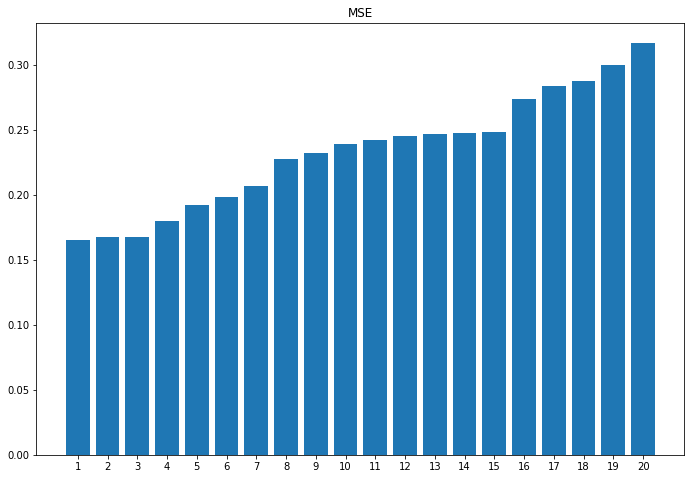

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([1,1,1.5,1.5])
numb = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19','20']
mse_10 = joblib.load('./data/mse_desc_10.pkl')
ax.bar(numb,mse_10)
plt.title('MSE')
plt.show()

In [30]:
# mse_5 = joblib.load('./data/mse_desc_5.pkl')
# mse_10 = joblib.load('./data/mse_desc_10.pkl')
# mse_15 = joblib.load('./data/mse_desc_15.pkl')
# mse_20 = joblib.load('./data/mse_desc_20.pkl')
# mse_25 = joblib.load('./data/mse_desc_25.pkl')

In [31]:
# mse_5, mse_10, mse_15, mse_20, mse_25
# frames = [mse_5, mse_10, mse_15, mse_20, mse_25]
# df_keys = pd.concat(frames, keys=['mse_5', 'mse_10', 'mse_15', 'mse_20', 'mse_25'], axis=1)
# df_keys.sort_values(by=['mse_5', 'mse_10', 'mse_15', 'mse_20', 'mse_25'], inplace=True)
# df_keys